In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [12]:
my_time = df['pickup_datetime'][0]

In [13]:
my_time

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [14]:
my_time.hour

8

In [15]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [16]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours = 4)

In [17]:
df['Hour'] = df['EDTdate'].dt.hour

In [18]:
df['AMorPM'] = np.where(df["Hour"]<12, 'am', 'pm')

In [19]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [20]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [21]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [22]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [23]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [24]:
y_col = ['fare_amount']

In [25]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [26]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [27]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [28]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [29]:
df["AMorPM"].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [30]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [31]:
hr = df['Hour'].cat.codes.values

In [32]:
ampm = df['AMorPM'].cat.codes.values

In [33]:
wkdy = df['Weekday'].cat.codes.values

In [34]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [35]:
ampm

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [36]:
wkdy

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [37]:
cats = np.stack([hr,ampm,wkdy], axis = 1)

In [38]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [39]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [40]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [41]:
cats = torch.tensor(cats,dtype = torch.int64)

In [42]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [43]:
conts = np.stack([df[col].values for col in cont_cols], 1)

In [44]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [45]:
conts = torch.tensor(conts, dtype = torch.float)

In [46]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [47]:
df[y_col].values

array([[ 6.5],
       [ 6.9],
       [10.1],
       ...,
       [12.5],
       [ 4.9],
       [ 5.3]])

In [48]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

In [49]:
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [50]:
cats.shape

torch.Size([120000, 3])

In [51]:
conts.shape

torch.Size([120000, 6])

In [52]:
y.shape

torch.Size([120000, 1])

In [53]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [54]:
cat_szs

[24, 2, 7]

In [55]:
emb_szs = [(size, min(50,(size+1)//2)) for size in cat_szs]

In [56]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [57]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [58]:
catz = cats[:2]

In [59]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [60]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni, nf in emb_szs])

In [61]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [62]:
#Foward Method(cats)
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [63]:
embeddingz

[tensor([[-0.1292, -0.3962, -0.7650,  0.6705, -0.0119, -1.2396, -0.9855, -0.5033,
           0.9401,  0.1631,  0.6998, -0.8694],
         [ 0.3115,  1.1329,  0.0468, -0.7310,  0.1468,  1.7564, -1.5060, -0.7196,
           2.4460,  0.0594,  0.9095,  0.9375]], grad_fn=<EmbeddingBackward>),
 tensor([[0.5214],
         [0.5214]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.0807,  1.0858,  0.7514,  0.9219],
         [ 1.5232,  0.4699, -1.5769,  1.9195]], grad_fn=<EmbeddingBackward>)]

In [64]:
z = torch.cat(embeddingz,1)

In [65]:
z

tensor([[-0.1292, -0.3962, -0.7650,  0.6705, -0.0119, -1.2396, -0.9855, -0.5033,
          0.9401,  0.1631,  0.6998, -0.8694,  0.5214, -1.0807,  1.0858,  0.7514,
          0.9219],
        [ 0.3115,  1.1329,  0.0468, -0.7310,  0.1468,  1.7564, -1.5060, -0.7196,
          2.4460,  0.0594,  0.9095,  0.9375,  0.5214,  1.5232,  0.4699, -1.5769,
          1.9195]], grad_fn=<CatBackward>)

In [66]:
selfembddrop = nn.Dropout(0.4)

In [67]:
z = selfembddrop(z)

In [68]:
z

tensor([[-0.2153, -0.0000, -0.0000,  0.0000, -0.0198, -2.0660, -1.6424, -0.0000,
          1.5668,  0.0000,  1.1664, -1.4491,  0.0000, -1.8012,  1.8097,  1.2524,
          1.5366],
        [ 0.5192,  1.8882,  0.0000, -1.2183,  0.0000,  2.9274, -0.0000, -1.1993,
          0.0000,  0.0991,  0.0000,  0.0000,  0.8689,  0.0000,  0.7832, -2.6282,
          0.0000]], grad_fn=<MulBackward0>)

In [93]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

In [94]:
torch.manual_seed(33)

In [95]:
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p = 0.4)

In [96]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [97]:
criterion = nn.MSELoss() #np,sqrt(MSE) -->RMSE
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)

In [98]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [99]:
# Data Suffled Already
cat_train= cats[:batch_size-test_size]
cat_test= cats[batch_size-test_size:batch_size]
con_train= conts[:batch_size-test_size]
con_test= conts[batch_size-test_size:batch_size]

In [100]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [101]:
len(cat_train)

48000

In [102]:
len(cat_test)

12000

In [103]:
len(con_train)

48000

In [105]:
import time


start_time = time.time()

epochs = 300
losses = []


for i in range(epochs):
    
    i+=1
    
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss.detach().numpy())
    
    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1 loss is 12.500160217285156
epoch: 11 loss is 12.163108825683594
epoch: 21 loss is 11.74620246887207
epoch: 31 loss is 11.31534194946289
epoch: 41 loss is 10.9061279296875
epoch: 51 loss is 10.47035026550293
epoch: 61 loss is 10.077844619750977
epoch: 71 loss is 9.694079399108887
epoch: 81 loss is 9.368143081665039
epoch: 91 loss is 9.044804573059082
epoch: 101 loss is 8.726293563842773
epoch: 111 loss is 8.391926765441895
epoch: 121 loss is 8.01723575592041
epoch: 131 loss is 7.619124412536621
epoch: 141 loss is 7.186443328857422
epoch: 151 loss is 6.732907295227051
epoch: 161 loss is 6.243615627288818
epoch: 171 loss is 5.749632835388184
epoch: 181 loss is 5.262953281402588
epoch: 191 loss is 4.7969279289245605
epoch: 201 loss is 4.382323265075684
epoch: 211 loss is 4.04145622253418
epoch: 221 loss is 3.7588188648223877
epoch: 231 loss is 3.5860962867736816
epoch: 241 loss is 3.50465726852417
epoch: 251 loss is 3.467280149459839
epoch: 261 loss is 3.4415714740753174
epoch: 27

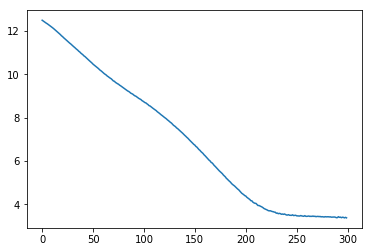

In [106]:
plt.plot(range(epochs), losses)

In [107]:
with torch.no_grad():
    
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val,y_test))

In [108]:
loss

tensor(3.3466)

In [116]:
for i in range(10):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i})Predicted: {y_val[i].item():9.2f} TRUE: {y_test[i].item():8.2f} DIFF: {diff:8.2f}')


0)Predicted:      2.49 TRUE:     2.90 DIFF:     0.41
1)Predicted:     23.48 TRUE:     5.70 DIFF:    17.78
2)Predicted:      7.97 TRUE:     7.70 DIFF:     0.27
3)Predicted:     14.75 TRUE:    12.50 DIFF:     2.25
4)Predicted:      4.68 TRUE:     4.10 DIFF:     0.58
5)Predicted:      3.84 TRUE:     5.30 DIFF:     1.46
6)Predicted:      2.91 TRUE:     3.70 DIFF:     0.79
7)Predicted:     19.35 TRUE:    14.50 DIFF:     4.85
8)Predicted:      2.55 TRUE:     5.70 DIFF:     3.15
9)Predicted:     10.49 TRUE:    10.10 DIFF:     0.39


In [117]:
torch.save(model.state_dict(),'TaxiModel.pt')